In [22]:
import acquire
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prepare

In [6]:
sale_df=pd.read_csv('sales_df.csv')

/var/folders/3k/kd9rcxws7ygft2krzxncw_400000gn/T/ipykernel_5887/2539925104.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  sale_df=pd.read_csv('sales_df.csv')


In [10]:
sale_df=sale_df.drop(columns=['Unnamed: 0'])

/Users/qinzhichen/codeup-data-science/time_series_exercises/prepare.py:16: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('sales_df.csv')


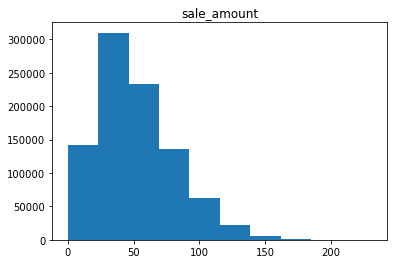

In [15]:
sale_df=prepare.prepare()

In [24]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   store_address  913000 non-null  object 
 5   store_city     913000 non-null  object 
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     365200 non-null  object 
 9   item_name      365200 non-null  object 
 10  item_price     365200 non-null  float64
 11  item_upc12     365200 non-null  float64
 12  item_upc14     365200 non-null  float64
 13  month          913000 non-null  object 
 14  day of week    913000 non-null  object 
 15  sales_total    365200 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 118.4+ MB

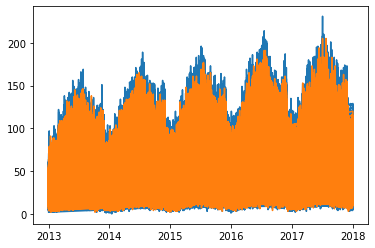

In [25]:
# split the dataframe
train_size = .70
n = sale_df.shape[0]
test_start_index = round(train_size * n)

train = sale_df[:test_start_index] 
test = sale_df[test_start_index:]
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

In [26]:
train.groupby('store_state').agg('sum')

,item_id,sale_amount,sale_id,store_id,store_zipcode,item_price,item_upc12,item_upc14,sales_total
store_state,,,,,,,,,
TX,11503800,34792454.0,204224724550,3515050,49993469680,1665312.0,8.300518e+16,8.300518e+16,1.006352e+08


In [19]:
# all stores are located in the texas

<AxesSubplot:ylabel='Frequency'>

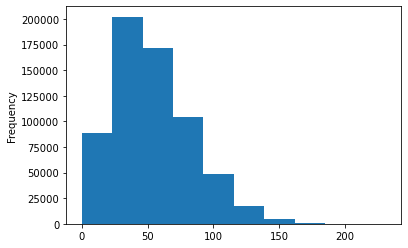

In [28]:
train.sale_amount.plot.hist()

In [29]:
# majority of those items sold within 100 items range

<AxesSubplot:title={'center':'sales_total over week'}, xlabel='sale_date'>

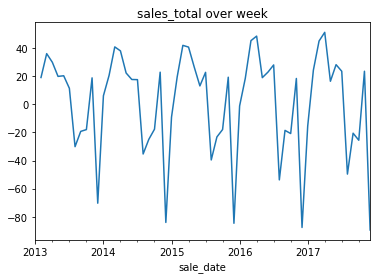

In [32]:
train.resample('M').mean().sales_total.diff().plot(title='sales_total over month')

In [34]:
# the sales total indicated that the trend year of year are increasing, 
# but each month of the end to the beginning of the year has drop 

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

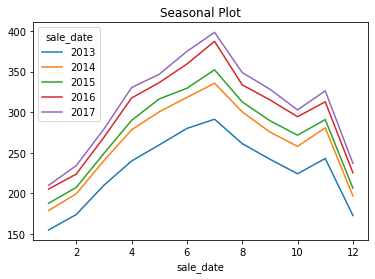

In [35]:
# .unstack turns an index level into columns
train.groupby([train.index.year, train.index.month]).mean().sales_total.unstack(0).plot(title='Monthly sale Plot')

In [42]:
# the monthly sale year over year is relatively same
# However, each year has certain increase.
# The most significant increase would be from 2013 to 2014

In [43]:
train.item_price.value_counts()
# the item price is pretty equally distributed

0.84    18260
6.44    18260
0.74    18260
4.39    18260
1.16    18260
5.17    18260
9.11    18260
7.54    18260
6.47    18260
8.40    18260
3.93    18260
3.17    18260
1.79    18260
1.68    18260
9.64    18260
6.93    18260
2.61    18260
3.14    18260
2.43    18260
5.62    18260
Name: item_price, dtype: int64

,item_id,this_month,sale_id,store_id,store_zipcode,item_price,item_upc12,item_upc14,sales_total,the_next_month
sale_date,,,,,,,,,,
2013-01-31,18.0,30.584147,318653.0,5.5,78224.8,4.56,2.272869e+11,2.272869e+11,154.827076,34.251939
2013-02-28,18.0,34.251939,318682.5,5.5,78224.8,4.56,2.272869e+11,2.272869e+11,173.907193,41.480922
2013-03-31,18.0,41.480922,318712.0,5.5,78224.8,4.56,2.272869e+11,2.272869e+11,209.951700,47.359524
2013-04-30,18.0,47.359524,318742.5,5.5,78224.8,4.56,2.272869e+11,2.272869e+11,239.852102,51.353825
2013-05-31,18.0,51.353825,318773.0,5.5,78224.8,4.56,2.272869e+11,2.272869e+11,259.725403,55.278381
2013-06-30,18.0,55.278381,318803.5,5.5,78224.8,4.56,2.272869e+11,2.272869e+11,280.042328,57.502212
2013-07-31,18.0,57.502212,318834.0,5.5,78224.8,4.56,2.272869e+11,2.272869e+11,291.433995,51.574009
2013-08-31,18.0,51.574009,318865.0,5.5,78224.8,4.56,2.272869e+11,2.272869e+11,261.340289,47.890667
2013-09-30,18.0,47.890667,318895.5,5.5,78224.8,4.56,2.272869e+11,2.272869e+11,242.114560,44.133733


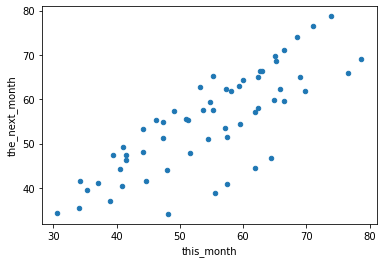

In [46]:
monthly = train.resample('M').mean()
monthly['the_next_month'] = monthly.sale_amount.shift(-1)
monthly = monthly.rename(columns={'sale_amount': 'this_month'})
monthly.plot.scatter(x='this_month', y='the_next_month')
monthly

In [47]:
# the lag plot showed a strong linear regression

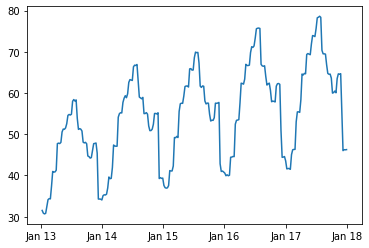

In [49]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = train.resample('W').mean().sale_amount

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))


In [50]:
# year over year sale amount increased